<a href="https://colab.research.google.com/github/raheeltahir55/CE888/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score as f1

In [3]:
df_orig= pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df= df_orig
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(df.columns)
features=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
print(df[features].head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
   age        job  marital  ... cons.conf.idx euribor3m nr.employed
0   56  housemaid  married  ...         -36.4     4.857      5191.0
1   57   services  married  ...         -36.4     4.857      5191.0
2   37   services  married  ...         -36.4     4.857      5191.0
3   40     admin.  married  ...         -36.4     4.857      5191.0
4   56   services  married  ...         -36.4     4.857      5191.0

[5 rows x 20 columns]


In [5]:
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


In [6]:
outcome= ['y']
print(df[outcome].head())

    y
0  no
1  no
2  no
3  no
4  no


In [7]:
#str_variables= ['job', 'marital', 'education', 'default', 'housing', 'loan',
#       'contact', 'month', 'day_of_week', 'poutcome', 'y']

#for i in range(len(str_variables)):
#    df[[str_variables[i]]]=df[[str_variables[i]]].apply(LabelEncoder().fit_transform)

df[['y']]=df[['y']].apply(LabelEncoder().fit_transform)

#print(df)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
cat_features= ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

outcomes_of_interest = ["y"]

X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

#print(X_df.head())
#print(set(X_df['loan']))

X_df = pd.get_dummies(X_df, columns=cat_features)
print(X_df.columns)

X_df = X_df.drop(["duration"], axis=1)
print(X_df.columns)

X_df.head()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [9]:
print("Number of rows before dropping NaNs: %d" % len(X_df))
print("Number of rows before dropping NaNs: %d" % len(y_df))
X_df = X_df.dropna()
y_df = y_df.dropna()
print("Number of rows before dropping NaNs: %d" % len(X_df))
print("Number of rows before dropping NaNs: %d" % len(y_df))

Number of rows before dropping NaNs: 41188
Number of rows before dropping NaNs: 41188
Number of rows before dropping NaNs: 41188
Number of rows before dropping NaNs: 41188


0    36548
1     4640
Name: y, dtype: int64

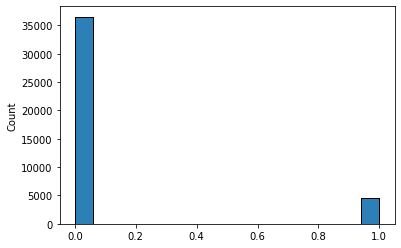

In [12]:
X = X_df.values
y = y_df.values.T[0]
sns.histplot(y, kde=False)
y = (y - y.min())/(y.max() - y.min())
sns.histplot(y, kde=False)

y_df['y'].value_counts()

#X.shape

#print(X)
#print(len(X))

In [41]:
n_test = 100
n_repeat = 1000
from numpy import array
#estimator = DecisionTreeRegressor()
#estimator = RandomForestRegressor()

#y_predicts = np.ones((n_repeat, len(X))) * np.nan
#print(y_predicts)
#a=array(y_predicts)
#a.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify=y) # zero or any other integer
#estimator.fit(X_train, y_train)
#y_predict = estimator.predict(X_test)

#ln_ytest=len(y_test)
#j= np.ones((8238,), dtype= int)
#y_predicts[i, j] = y_predict

#model=estimator.fit(X_train, y_train)
#model=estimator.fit(X_test, y_test)
#print(model.score(X_train, y_train), model.score(X_test, y_test))

#a=array(X_test)
#a=array(X_train)
#a=array(y_test)
#a=array(y_train)
#a.shape

###sorted(sklearn.metrics.SCORERS.keys())

In [23]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X, y)
print("Dummy ACC: %.2f" % acc(y, dummy_clf.predict(X)))

Dummy ACC: 0.80


In [24]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X, y)
print("Dummy F1: %.2f" % f1(y, dummy_clf.predict(X)))

Dummy F1: 0.10


In [27]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(acc))  # cross-validation
print(scores)
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

[0.89438543 0.89863429 0.89468892 0.89984825 0.89408194 0.9016692
 0.90713202 0.89742033 0.89863429 0.89650986]
ACC: 0.90 +/- 0.00


In [ ]:
fit= clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.8997329448895363


In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 3, 5, 8],
  #  'min_samples_split': [2, 3, 4],
  #  'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(estimator = clf, param_grid= param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
clf_best = RandomForestClassifier(n_estimators=200, max_depth=8, max_features= 'sqrt')
scores = cross_val_score(clf_best, X_train, y_train, cv=10, scoring=make_scorer(acc))  # cross-validation
print(scores)
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

[0.89681335 0.90257967 0.89499241 0.90075873 0.89438543 0.90409712
 0.90955994 0.89772382 0.89984825 0.89711684]
ACC: 0.90 +/- 0.00


In [ ]:
fit= clf_best.fit(X_train, y_train)
predictions = clf_best.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.8999757222626851


In [ ]:
clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:
clf_f1 = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=60)
scores = cross_val_score(clf_f1, X_train, y_train, cv=10, scoring=make_scorer(f1))  # cross-validation
print(scores)
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

[0.37721022 0.37984496 0.30020284 0.32586558 0.28803245 0.35341365
 0.43263757 0.32064128 0.36291913 0.33925049]
F1: 0.35 +/- 0.04


In [43]:
fit= clf_f1.fit(X_train, y_train)
predictions = clf_f1.predict(X_test)
print("F1: %.2f" % (metrics.f1_score(y_test, predictions)))

F1: 0.37


[ 7  8  2 61  4  0  6  5  1  3 59 60 52 49 43 50 42 55 31 38 36 56 54 23
 57 22 44 28 58  9 39 10 14 41 18 30 27 48 17 33 21 34 25 53 16 32 13 26
 19 15 51 45 47 12 37 40 11 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.137780)
2. nr.employed (0.116927)
3. pdays (0.074017)
4. poutcome_success (0.069784)
5. emp.var.rate (0.061363)
6. age (0.060166)
7. cons.conf.idx (0.055543)
8. cons.price.idx (0.048979)
9. campaign (0.026308)
10. previous (0.025351)
11. poutcome_failure (0.016382)
12. poutcome_nonexistent (0.014782)
13. month_oct (0.013438)
14. month_mar (0.012811)
15. contact_telephone (0.012810)
16. month_may (0.012357)
17. contact_cellular (0.012290)
18. day_of_week_mon (0.010371)
19. education_university.degree (0.009047)
20. housing_yes (0.008521)
21. housing_no (0.008431)
22. day_of_week_thu (0.008164)
23. day_of_week_fri (0.007796)
24. marital_single (0.007611)
25. day_of_week_tue (0.007523)
26. marital_married (0.007450)
27. month_apr (0.007437)
28. education_high.school (0.

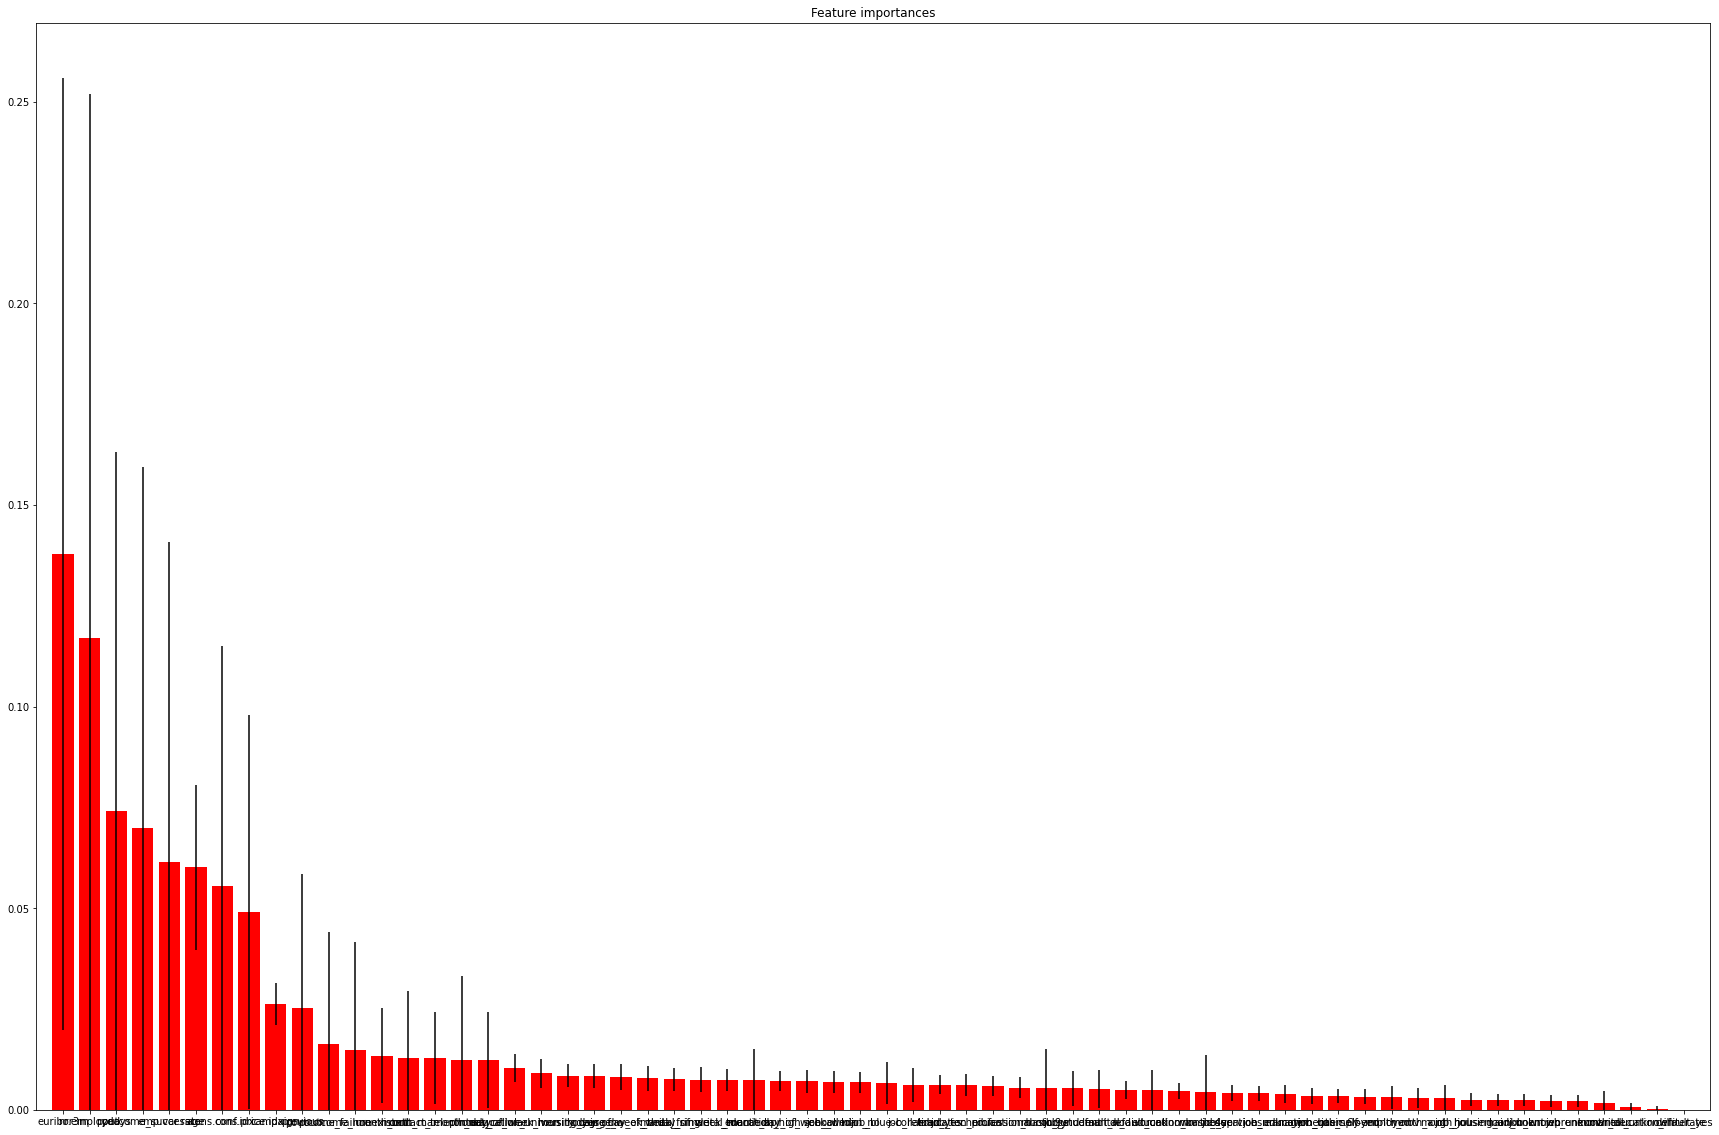

In [45]:
importances = clf_f1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_f1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")
features_bank= ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features_bank[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features_bank)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(30, 20)

# plt.savefig("importances.pdf", bbox_inches='tight')